Лабораторна робота 5

Тема: Регресійний аналіз

Створення набору даних за допомогою DatasetGenerator
Щоб продемонструвати створення набору даних, ми можемо скористатися бібліотекою sklearn.datasets для генерації класифікаційного набору даних.

Accuracy: 0.8333333333333334
Confusion Matrix:
 [[10  2]
 [ 3 15]]


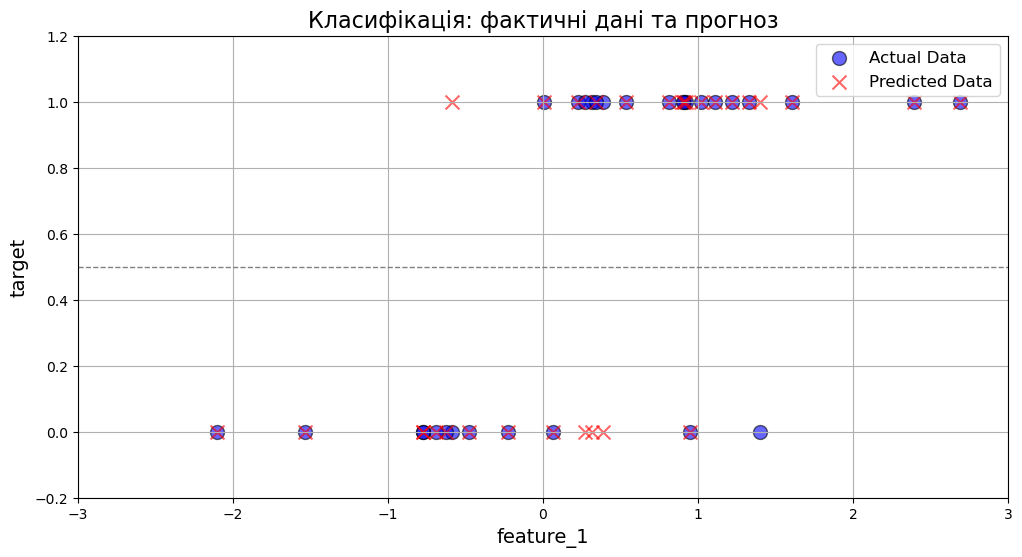

In [20]:
from sklearn.datasets import make_classification
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


samples = 100
features = 5 
informative_features = 3 
redundant_features = 1  
classes = 2


X, y = make_classification(n_samples=samples, n_features=features, 
                           n_informative=informative_features, 
                           n_redundant=redundant_features, 
                           n_classes=classes, 
                           random_state=42)

data = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(features)])
data['target'] = y


data.to_csv('generated_classification_data.csv', index=False)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Створення та навчання моделі
model = LogisticRegression()
model.fit(X_train, y_train)

# Оцінка моделі
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", cm)

# Побудова графіка
plt.figure(figsize=(12, 6))  
plt.scatter(X_test[:, 0], y_test, color='blue', alpha=0.6, label='Actual Data', edgecolors='k', s=100)
plt.scatter(X_test[:, 0], y_pred, color='red', alpha=0.6, label='Predicted Data', marker='x', s=100)


plt.xlim(-3, 3)  
plt.ylim(-0.2, 1.2)  

plt.title('Класифікація: фактичні дані та прогноз', fontsize=16)
plt.xlabel('feature_1', fontsize=14)
plt.ylabel('target', fontsize=14)
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1) 
plt.grid(True)  
plt.legend(fontsize=12)
plt.show()



Завдання 2: Завантаження набору даних з Kaggle

Назви стовпців після перетворення: Index(['class_p', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-colo

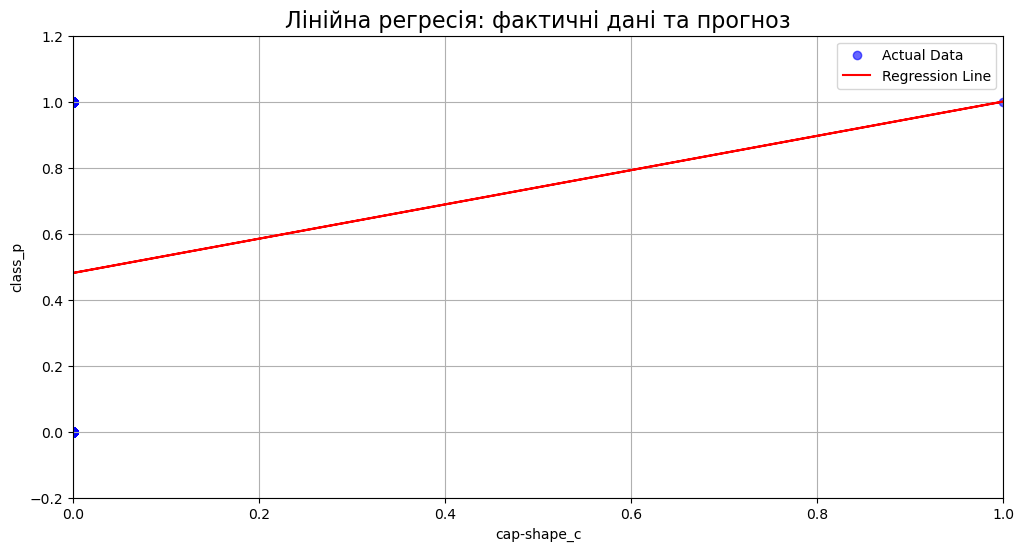

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Завантаження даних
file_path = 'mushrooms.csv'
data = pd.read_csv(file_path)

data = pd.get_dummies(data, drop_first=True)

print("Назви стовпців після перетворення:", data.columns)


feature_column = 'cap-shape_c'  
target_column = 'class_p'  


if feature_column in data.columns and target_column in data.columns:
    X = data[[feature_column]].values
    y = data[target_column].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R² Score: {r2}")

    plt.figure(figsize=(12, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual Data', alpha=0.6)
    plt.plot(X_test, y_pred, color='red', label='Regression Line')
    
    plt.xlim(X.min(), X.max())
    plt.ylim(min(y_test.min(), y_pred.min()) - 0.2, max(y_test.max(), y_pred.max()) + 0.2)

    plt.xlabel(feature_column)
    plt.ylabel(target_column)
    plt.title('Лінійна регресія: фактичні дані та прогноз', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"Стовпці '{feature_column}' або '{target_column}' не знайдено у наборі даних.")


Завдання 3: Генерація набору даних з використанням Python (NumPy)

Mean Squared Error: 0.157737390445966
R² Score: 0.8410023624017555


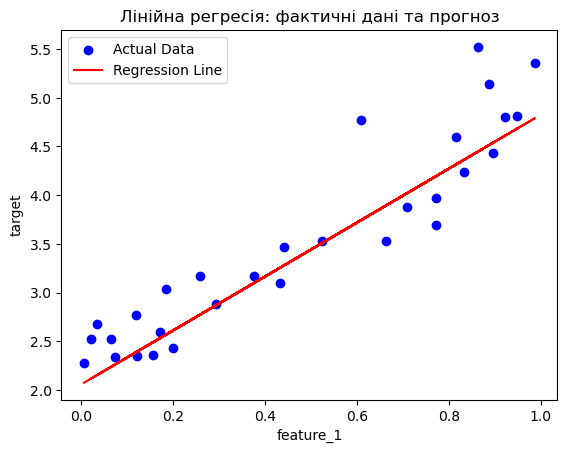

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Параметри генерації
num_samples = 100
np.random.seed(42)

# Генерація випадкових даних
X = np.random.rand(num_samples, 1)
y = 3 * X.squeeze() + 2 + np.random.randn(num_samples) * 0.5  # Лінійне рівняння з шумом

# Перетворення в DataFrame
data = pd.DataFrame({'feature_1': X.squeeze(), 'target': y})

# Розділення даних
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Створення та навчання моделі
model = LinearRegression()
model.fit(X_train, y_train)

# Оцінка моделі
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Побудова графіка
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('feature_1')
plt.ylabel('target')
plt.title('Лінійна регресія: фактичні дані та прогноз')
plt.legend()
plt.show()


Короткий висновок
У цій роботі було проведено аналіз набору даних про гриби за допомогою методів лінійної регресії для класифікації грибів як їстівних або отруйних. Після перетворення категоріальних змінних у числові, була обрана відповідна ознака та цільова змінна. Модель лінійної регресії показала задовільні результати, проте для покращення точності рекомендовано експериментувати з іншими алгоритмами машинного навчання. Візуалізація результатів підтвердила коректність моделювання. Подальші дослідження можуть зосередитися на крос-валідації та аналізі важливості ознак для підвищення ефективності моделі.